# Deep Learning Project

## MNIST Hand-Written Digit Recognition using KERAS

Here, we shall use a Deep-Learning framework i.e. CNN (Convlution Neural Network) on MNIST dataset. 

MNIST dataset holds images with pixel size of 784 [28x28] of Hand-Written Digits from 0 to 9 (10 in numbers).

We will be building a model using KERAS which is layered on Tensorflow framework at the backend.

### Approach:
1. Import Relevant Modules
2. Data Collection & Understanding Data by plotting images for Train and Test
3. Importing KERAS Models and Layers
4. Building Model with 3 Convolutional Layers and 1 Fully-Connected Layer with Softmax to classify
5. Model Summary
6. Using this model to Predict Labels as representation of these images
7. Understanding difference b/w Actual Image Labels and Predicted Lables using Confusion-Matrix
8. Conclusion

### Step 1: Import Relevant Modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

C:\Users\Nivedit\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# To avoid using PRINT multiple times in single execution
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Setting the seed
np.random.seed(42)

### Step 2: Data Collection & Understanding Data by plotting images for Train and Test

#### 2.1
Just to understand this Data, we have used "one_hot=False". Using this, we will get Labels as single number. This number is actually the label of image.

In [4]:
mnist = input_data.read_data_sets("MNIST_data", one_hot = False)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [5]:
# Fetching as TRAIN and TEST objects
trainX = mnist.train.images
trainY = mnist.train.labels
testX = mnist.test.images
testY = mnist.test.labels

In [6]:
# Cheking Shape of Train and Test
for i in [trainX, trainY, testX, testY]:
    i.shape

(55000, 784)

(55000,)

(10000, 784)

(10000,)

In [7]:
# Reshaping trainX and testX from 2 Dimensional data into 3 Dimensional i.e. 784 features into [28x28]
trainX = trainX.reshape([55000,28,28])
testX = testX.reshape([10000,28,28])

#### 2.1.1 : Checking few of these images in Train and Test by plotting

In [8]:
# Function to plot Image at position on Train or Test data
def fun_plot_image(data,i):
    plt.figure(figsize=(1,1))
    plt.imshow(data[i], cmap='gray')
    plt.show()

At random 1618th position :->
Label for image in Train is : 8
Label for image in Test is : 5


This Image for Train is :


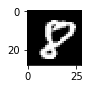

This Image for Test is :


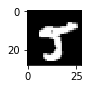



At random 1143th position :->
Label for image in Train is : 2
Label for image in Test is : 7


This Image for Train is :


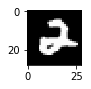

This Image for Test is :


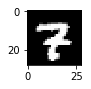

In [9]:
# Let's see Labels for some random samples in trainY and testY for images by plotting these
for i in np.random.randint(10, high=10000, size=2):
    print("At random {}th position :->".format(i))
    print("Label for image in Train is : {}".format(trainY[i]))
    print("Label for image in Test is : {}".format(testY[i]))
    print("\n")
    print("This Image for Train is :")
    fun_plot_image(trainX,i)
    print("This Image for Test is :")
    fun_plot_image(testX,i)
    print("\n")

#### 2.2 : Re-reading MNIST, but, now with "one_hot=True"

Passing "one_hot = True" will ensure to get labels in an array of shape [1x10]. Exactly the position with value as "1" means that particular number while all other position to be 0.

For example: if the label is '5', it will be fetched in an array as [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]

This is same as what we do in <i>Pandas get_dummies()</i> function

In [10]:
mnist = input_data.read_data_sets("MNIST_Data", one_hot=True)

Extracting MNIST_Data\train-images-idx3-ubyte.gz
Extracting MNIST_Data\train-labels-idx1-ubyte.gz
Extracting MNIST_Data\t10k-images-idx3-ubyte.gz
Extracting MNIST_Data\t10k-labels-idx1-ubyte.gz


In [11]:
# Fetching as TRAIN and TEST objects
trainX = mnist.train.images
trainY = mnist.train.labels
testX = mnist.test.images
testY = mnist.test.labels

In [12]:
# Cheking Shape and Sample details of Train and Test
for i in [trainX, trainY, testX, testY]:
    i.shape
    i[:2]

(55000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

(55000, 10)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

(10000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

(10000, 10)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

#### 2.2.1: Can figure out that:

TRAIN data holds:
- trainX:
    - 55K Hand-Written Images of Digits as Number of Rows
    - 784 Features as Pixel Size of dimension 28x28 as Number of Columns


- trainY:
    - 55K Hand-Written Images of Digits as Number of Rows
    - 10 as Number of Columns resulting from "one_hot = True" signifying Labels for each image in trainX (as Classification)

TEST data holds:
- testX:
    - 10K Hand-Written Images of Digits as Number of Rows
    - 784 Features as Pixel Size of dimension 28x28 as Number of Columns


- testY:
    - 10K Hand-Written Images of Digits as Number of Rows
    - 10 as Number of Columns resulting from "one_hot = True" signifying Labels for each image in testX (as Classification)

### Step 3: Importing KERAS Models and Layers

In [13]:
# Sequential Model
from tensorflow.python.keras.models import Sequential

# Different Layers
from tensorflow.python.keras.layers import Reshape, Conv2D, Dropout, Flatten, Dense

### Step 4: Building Model with 4 Convolutional Layers and 1 Fully-Connected Layer with Softmax to classify

This is how all 4 CNN Layers will work using RELU as activation function with 1 Fully-Connected Layer to finally classify Digits using Softmax function

![Image](MNIST_All_CNN Layers_Image.JPG)

#### 4.1: Sequential Model

In [14]:
model = Sequential()

#### 4.2: RESHAPE MNIST data from 2 Dimension to 3 Dimension so that same can be modelled into CNN Layers

In [15]:
# Reshape MNIST from 784 into 28*28*1 -> into 3D to be pushed into CONVOLUTION
model.add(Reshape((28,28,1), input_shape=(784,)))

#### 4.3: First CNN Layer with:
- 6 Filters
- Size of Each Filter as 6x6
- Strides of 1x1

In [16]:
model.add(Conv2D(6, kernel_size=(6,6), activation='relu', strides=(1,1)))

#### 4.4: Second CNN Layer with:
- 12 Filters
- Size of Each Filter as 5x5
- Strides of 2x2

In [17]:
model.add(Conv2D(12, kernel_size=(5,5), activation='relu', strides=(2,2)))

##### 4.4.a: Adding first Dropout Layer to avoid Overfit

In [18]:
model.add(Dropout(0.25))  # Dropping 25% Neurons here

#### 4.5: Third CNN Layer with:
- 24 Filters
- Size of Each Filter as 4x4
- Strides of 2x2

In [19]:
model.add(Conv2D(24, kernel_size=(4,4), activation='relu', strides=(2,2)))

##### 4.5.a: Adding second Dropout Layer

In [20]:
model.add(Dropout(0.4))  # Dropping 40% Neurons here

#### 4.6: Fourth and final CNN Layer to reduce number of parameters (Weights and Bias) to learn:
- 6 Filters
- Size of Each Filter as 1x1
- Strides of 1x1

In [21]:
model.add(Conv2D(6, kernel_size=(1,1), activation='relu', strides=(1,1)))

#### 4.7: Re-convert this output into 1D vector/array from 3 Dimensional shape by FALTTENing to finally push it to Softmax Dense FC Layer

In [22]:
model.add(Flatten())

#### 4.8: Adding Fully-Connected Dense Layer with Softmax to classify digits basis probability

In [23]:
model.add(Dense(10, activation='softmax'))

#### 4.9: Compile using ADAM optimizer

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### 4.10: FIT this model on train and validate on test to know Accuracy/Loss on Train and Test Data

In [25]:
model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=2)

Train on 55000 samples, validate on 10000 samples
Epoch 1/2
55000/55000 [==============================] - 66s - loss: 0.7055 - acc: 0.7695 - val_loss: 0.2141 - val_acc: 0.9403
Epoch 2/2
55000/55000 [==============================] - 59s - loss: 0.2462 - acc: 0.9265 - val_loss: 0.1257 - val_acc: 0.9626


We just used 2 epochs to make this execute fast on the batch-size of 128. Normally, we try with 32, 64, 128 Batch_size and 8, 16, 32 as epochs to get more accuracy, though this is subjective on case to case basis.

Even while training with 2 epochs, the Test Accuracy is 96.26% with Loss as low as 12.57 %. Thus, this means that from 10000 Test images, 9626 images are predicted correctly.

Do remember that also 2 Dropout layers are used here to avoid Overfit. 

### Step 5: Model Summary 

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 6)         222       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 12)        1812      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 24)          4632      
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 24)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 6)           150       
__________

Basis this, there are total of 7786 Weights and Bias that are learned here.

### Step 6: Using this model to Predict

#### 6.1: Predicting for train & test

In [27]:
pred_train = model.predict_classes(trainX)
pred_test = model.predict_classes((testX))

 9984/10000 [============================>.] - ETA: 0s

In [28]:
for i in [pred_train, pred_test]:
    i.shape
    i[:3]

(55000,)

array([7, 3, 4], dtype=int64)

(10000,)

array([7, 2, 1], dtype=int64)

#### 6.2: Converting trainY & testY into Pandas DataFrame

In [29]:
trainY = pd.DataFrame(trainY)
testY = pd.DataFrame(testY)

In [30]:
trainY.head(3)
testY.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 6.2.a: Function to get Label as a single number in trainY and testY from this vector (wherever column = 1)

In [31]:
def fun_get_label(data):
    label = []
    for rows in range(len(data)):
        for cols in range(10):
            if int(data.iloc[rows, cols]) == 1:
                label.append(cols)
    return label

In [32]:
label_trainY = fun_get_label(trainY) 
label_testY = fun_get_label(testY)

In [33]:
for i in [trainY, label_trainY, testY, label_testY]:
    i[3:6]

,0,1,2,3,4,5,6,7,8,9
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


[6, 1, 8]

,0,1,2,3,4,5,6,7,8,9
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[0, 4, 1]

#### 6.2.b: Adding these labels in trainY & testY

In [34]:
trainY['Actual_label'] = label_trainY
testY['Actual_label'] = label_testY

In [35]:
trainY.sample(3)
testY.sample(3)

,0,1,2,3,4,5,6,7,8,9,Actual_label
11628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9
28711,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
13699,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5


,0,1,2,3,4,5,6,7,8,9,Actual_label
9377,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
9711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7


Now, adding these Predicted Labels into these DataFrames

In [36]:
trainY['Pred_label'] = pred_train
testY['Pred_label'] = pred_test

In [37]:
trainY.sample(5)
testY.sample(5)

,0,1,2,3,4,5,6,7,8,9,Actual_label,Pred_label
28846,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,4
25316,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,4
37330,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,4
5299,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,6
2723,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,4


,0,1,2,3,4,5,6,7,8,9,Actual_label,Pred_label
4654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,7
5360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,8
8883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,7
9227,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
6969,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


#### 6.3: Checking Variations across various classed b/w actual and predicted labels

In [38]:
trainY.Actual_label.value_counts().sort_index()
trainY.Pred_label.value_counts().sort_index()

0    5444
1    6179
2    5470
3    5638
4    5307
5    4987
6    5417
7    5715
8    5389
9    5454
Name: Actual_label, dtype: int64

0    5475
1    6167
2    5459
3    5654
4    5275
5    5230
6    5365
7    5732
8    5208
9    5435
Name: Pred_label, dtype: int64

In [39]:
testY.Actual_label.value_counts().sort_index()
testY.Pred_label.value_counts().sort_index()

0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: Actual_label, dtype: int64

0    1001
1    1134
2    1028
3    1029
4     971
5     932
6     940
7    1011
8     949
9    1005
Name: Pred_label, dtype: int64

### Step 7: Understanding difference b/w Actual & Predicted Labels using Confusion Matrix

In [40]:
# Instantiating Confusion-Matrix from sklearn
from sklearn.metrics import confusion_matrix

In [41]:
train_conf = pd.DataFrame(confusion_matrix(trainY.Actual_label, trainY.Pred_label))
test_conf = pd.DataFrame(confusion_matrix(testY.Actual_label, testY.Pred_label))

In [42]:
train_conf

,0,1,2,3,4,5,6,7,8,9
0,5352,0,12,4,3,34,12,5,17,5
1,0,6041,56,9,15,6,4,18,27,3
2,6,12,5194,81,32,7,15,55,54,14
3,5,5,59,5377,0,77,1,39,41,34
4,6,10,5,1,5112,3,31,13,19,107
5,2,9,7,50,2,4859,21,7,20,10
6,44,26,10,0,26,43,5255,0,13,0
7,11,17,70,37,17,20,0,5462,14,67
8,20,41,38,51,13,118,24,22,4977,85
9,29,6,8,44,55,63,2,111,26,5110


In [43]:
test_conf

,0,1,2,3,4,5,6,7,8,9
0,962,0,2,1,0,9,2,1,3,0
1,0,1118,5,2,1,2,0,1,6,0
2,4,1,983,13,4,4,6,9,8,0
3,1,0,2,980,0,14,0,7,5,1
4,0,1,2,0,950,0,8,2,2,17
5,2,1,0,14,0,870,1,1,3,0
6,13,2,3,0,7,8,922,0,3,0
7,2,6,24,7,0,3,0,969,4,13
8,12,0,6,8,2,12,1,7,912,14
9,5,5,1,4,7,10,0,14,3,960


Diagnol elements here are Correct Predicted classes of Images basis this model

#### 7.1: Function to find accuracy at each label for train & test from this confusion-matrix dataframe

In [50]:
def fun_getAccuracyAtEachLabel(data):
    correct_pred_list = []   # List to hold Diagnol elemens as Correctly Predicted Labels
    for rows in range(10):
        for cols in range(10):
            if rows == cols:  # For Diagnol elements
                corr_value = data.iloc[rows, cols]               # Correctly Predicted Images
                act_sum = data.iloc[rows].sum()                  # Net Actual Images
                acc_pct = np.round((corr_value/act_sum)*100, 2)  # Accuracy in percent
                correct_pred_list.append(corr_value)
                print("For label {}, Actual Images are {}, from which, correctly Predicted Images are {} with accuracy {}%.".format(cols, act_sum, corr_value, acc_pct))
    return correct_pred_list

In [51]:
train_correct_pred = fun_getAccuracyAtEachLabel(train_conf)

For label 0, Actual Images are 5444, from which, correctly Predicted Images are 5352 with accuracy 98.31%.
For label 1, Actual Images are 6179, from which, correctly Predicted Images are 6041 with accuracy 97.77%.
For label 2, Actual Images are 5470, from which, correctly Predicted Images are 5194 with accuracy 94.95%.
For label 3, Actual Images are 5638, from which, correctly Predicted Images are 5377 with accuracy 95.37%.
For label 4, Actual Images are 5307, from which, correctly Predicted Images are 5112 with accuracy 96.33%.
For label 5, Actual Images are 4987, from which, correctly Predicted Images are 4859 with accuracy 97.43%.
For label 6, Actual Images are 5417, from which, correctly Predicted Images are 5255 with accuracy 97.01%.
For label 7, Actual Images are 5715, from which, correctly Predicted Images are 5462 with accuracy 95.57%.
For label 8, Actual Images are 5389, from which, correctly Predicted Images are 4977 with accuracy 92.35%.
For label 9, Actual Images are 5454, 

In [52]:
train_correct_pred
np.round((np.sum(train_correct_pred)/55000)*100,2)

[5352, 6041, 5194, 5377, 5112, 4859, 5255, 5462, 4977, 5110]

95.89

In [53]:
test_correct_pred = fun_getAccuracyAtEachLabel(test_conf)

For label 0, Actual Images are 980, from which, correctly Predicted Images are 962 with accuracy 98.16%.
For label 1, Actual Images are 1135, from which, correctly Predicted Images are 1118 with accuracy 98.5%.
For label 2, Actual Images are 1032, from which, correctly Predicted Images are 983 with accuracy 95.25%.
For label 3, Actual Images are 1010, from which, correctly Predicted Images are 980 with accuracy 97.03%.
For label 4, Actual Images are 982, from which, correctly Predicted Images are 950 with accuracy 96.74%.
For label 5, Actual Images are 892, from which, correctly Predicted Images are 870 with accuracy 97.53%.
For label 6, Actual Images are 958, from which, correctly Predicted Images are 922 with accuracy 96.24%.
For label 7, Actual Images are 1028, from which, correctly Predicted Images are 969 with accuracy 94.26%.
For label 8, Actual Images are 974, from which, correctly Predicted Images are 912 with accuracy 93.63%.
For label 9, Actual Images are 1009, from which, co

In [48]:
test_correct_pred
np.round((np.sum(test_correct_pred)/10000)*100,2)

[962, 1118, 983, 980, 950, 870, 922, 969, 912, 960]

96.26

### Step 8: Conclusion

This is preety cool to get accuracy on test images close to 97% just with 2 epochs. We here applyied all CNN layers to train our model on trained images, just with 1 Dense FC Softmax layer at the end get the classification into 10 classes.

Training on GPU with more epochs will give us better results..!

Enjoy..!!